# Ruido

In [2]:
from skimage import data
from skimage import io
from matplotlib import pyplot as plt
from skimage import color

In [5]:
halo_image = plt.imread('primerhalo.png') 
type(halo_image)

numpy.ndarray

In [8]:
def show_image(image, title='Image', cmap_type='gray'): 
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [20]:
def plot_comparison(original, filtered, title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols=2, 
                                   figsize=(20, 18), 
                                   sharex=True, 
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray) 
    ax1.set_title('original') 
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray) 
    ax2.set_title(title_filtered) 
    ax2.axis('off')

## Aplicando ruido

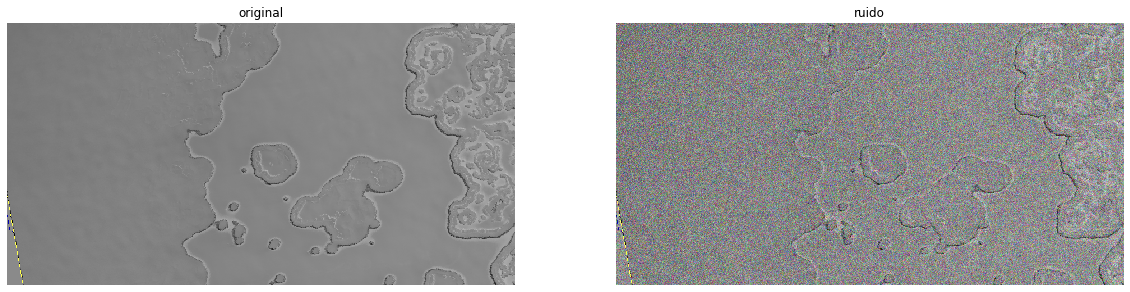

In [21]:
from skimage.util import random_noise
# Añadir el ruido a la imagen
noisy_image = random_noise(halo_image)
# MOSTRAR
plot_comparison(halo_image, noisy_image, "ruido")

## Quitando ruido

### método variación total (tv)

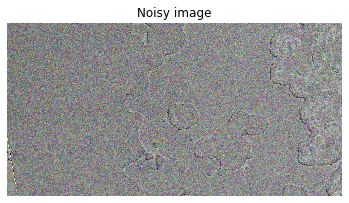

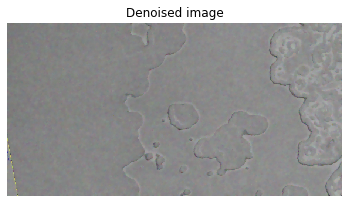

In [28]:
from skimage.restoration import denoise_tv_chambolle
# Aplicar la eliminación total del filtro de variación
denoised_image = denoise_tv_chambolle(noisy_image, weight=0.1,
multichannel=True)
# Mostrar
show_image(noisy_image, 'Noisy image') 
show_image(denoised_image, 'Denoised image')

### método bilateral

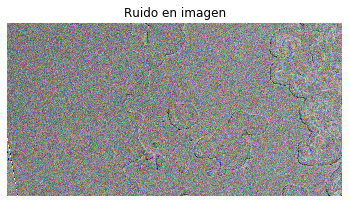

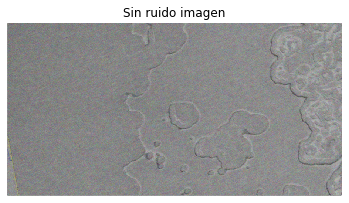

In [100]:
from skimage.restoration import denoise_bilateral 
# Aplicar filtro de eliminación de ruido bilateral
denoised_image = denoise_bilateral(noisy_image, multichannel=True)
# Mostrar
show_image(noisy_image, 'Ruido en imagen') 
show_image(denoised_image, 'Sin ruido imagen')

# Segmentación

## Segmentación no supervisasa SLIC
Técnica de segmentación basada en superpíxeles, denominada agrupación iterativa lineal simple SLIC
- Segmenta la imagen usando un algoritmo de aprendizaje automático llamado agrupación K-means.
- Toma todos los valores de píxeles de la imagen e intenta separarlos en un número predefinido de subregiones

In [39]:
from skimage.segmentation import slic 
from skimage import segmentation
from skimage.color import label2rgb

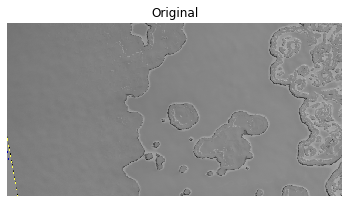

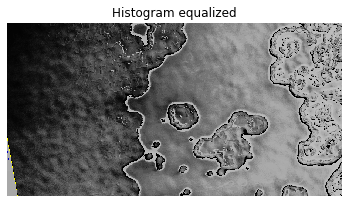

In [47]:
from skimage import exposure
# Obtener la imagen ecualizada
image_eq = exposure.equalize_hist(halo_image)
# Mostrar
show_image(halo_image, 'Original') 
show_image(image_eq, 'Histogram equalized')

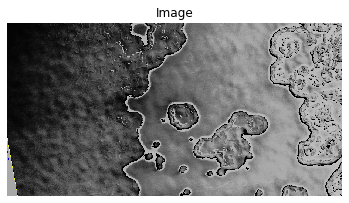

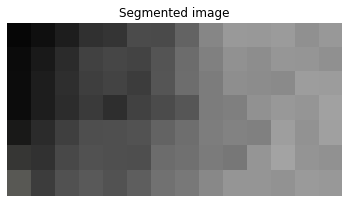

In [54]:
# Obtengo los segmentos
segments = segmentation.slic(image_eq)
# Coloque segmentos encima de la imagen original para comparar
segmented_image = label2rgb(segments, image_eq, kind='avg')
show_image(image_eq)
show_image(segmented_image, "Segmented image")

**especificando los segmentos**

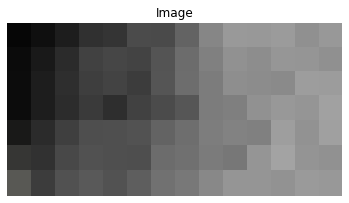

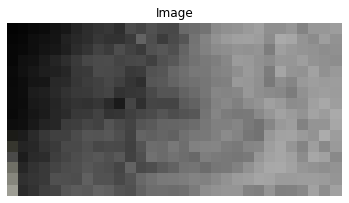

In [57]:
from skimage.segmentation import slic 
from skimage.color import label2rgb
# Obtengo los segmentos con 500 regiones
segments = slic(image_eq, n_segments= 500)
# Coloque segmentos encima de la imagen original para comparar
segmented_image2 = label2rgb(segments, image_eq, kind='avg') 
show_image(segmented_image)
show_image(segmented_image2)

## Encontrando contornos

In [58]:
from PIL import Image
img = Image.open('primerhalo.png').convert('L')
img.save('halosgris.png','png')
print(img)

<PIL.Image.Image image mode=L size=906x468 at 0x61B421B10>


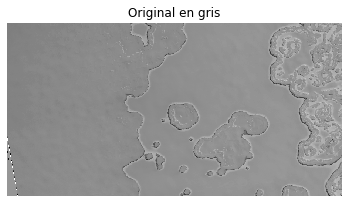

In [81]:
halo_gris = io.imread('halosgris.png')
show_image(halo_gris, "Original en gris")

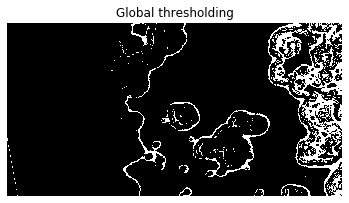

In [82]:
from skimage.filters import threshold_otsu 
# Obtengo el valor de umbral óptimo
thresh = threshold_otsu(halo_gris)
# Aplico thresholding a la imagen
thresholded_image = halo_gris > thresh
#Mostrar imagen original y binarizada
show_image(thresholded_image, 'Global thresholding')

# find_contours()

Pasos:
  - Hacer la imagen en escala de grises
  - Obtener el umbral 
  - Aplicar el umbral y obtener la imagen binaria
  - Encontrar los contornos con una constante de valor (0.8 o 0.5)

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure
# Construct some test data
x, y = np.ogrid[-np.pi:np.pi:100j, -np.pi:np.pi:100j]
r = np.sin(np.exp((np.sin(x)**3 + np.cos(y)**2)))
# Encuentra contornos a un valor constante de 0.8
contours = measure.find_contours(thresholded_image, 0.8)

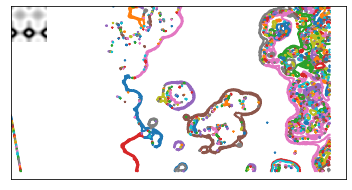

In [84]:
# Mostrar la imagen y trazar todos los contornos encontrados
fig, ax = plt.subplots()
ax.imshow(r, cmap=plt.cm.gray)

for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

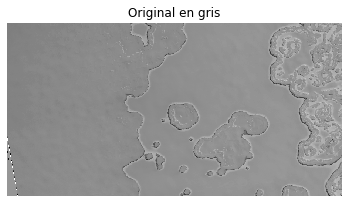

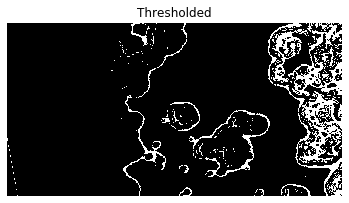

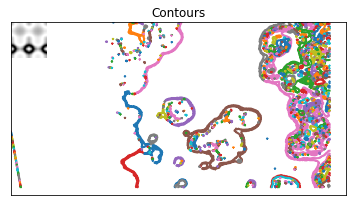

In [88]:
show_image(halo_gris, "Original en gris")
show_image(thresholded_image, "Thresholded")
fig, ax = plt.subplots()
ax.imshow(r, cmap=plt.cm.gray)

for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_title('Contours') 
ax.set_xticks([])
ax.set_yticks([])
plt.show()

In [89]:
for contour in contours: 
    print(contour.shape)

(3, 2)
(326, 2)
(10, 2)
(4, 2)
(32, 2)
(17, 2)
(785, 2)
(685, 2)
(7, 2)
(3, 2)
(17, 2)
(5, 2)
(32, 2)
(7, 2)
(59, 2)
(7, 2)
(144, 2)
(11, 2)
(13, 2)
(27, 2)
(408, 2)
(140, 2)
(10, 2)
(24, 2)
(11, 2)
(9, 2)
(7, 2)
(5, 2)
(5, 2)
(9, 2)
(5, 2)
(5, 2)
(101, 2)
(7, 2)
(5, 2)
(5, 2)
(7, 2)
(45, 2)
(5, 2)
(5, 2)
(5, 2)
(5, 2)
(15, 2)
(25, 2)
(5, 2)
(5, 2)
(11, 2)
(13, 2)
(9, 2)
(3, 2)
(7, 2)
(5, 2)
(9, 2)
(9, 2)
(5, 2)
(5, 2)
(11, 2)
(5, 2)
(17, 2)
(5, 2)
(5, 2)
(5, 2)
(23, 2)
(11, 2)
(7, 2)
(45, 2)
(951, 2)
(5, 2)
(5, 2)
(6, 2)
(5, 2)
(11, 2)
(11, 2)
(5, 2)
(49, 2)
(65, 2)
(21, 2)
(5, 2)
(5, 2)
(7, 2)
(7, 2)
(5, 2)
(2090, 2)
(13, 2)
(9, 2)
(9, 2)
(7, 2)
(81, 2)
(17, 2)
(11, 2)
(5, 2)
(5, 2)
(7, 2)
(7, 2)
(5, 2)
(93, 2)
(9, 2)
(5, 2)
(5, 2)
(5, 2)
(11, 2)
(5, 2)
(7, 2)
(45, 2)
(5, 2)
(5, 2)
(5, 2)
(7, 2)
(5, 2)
(5, 2)
(9, 2)
(77, 2)
(5, 2)
(5, 2)
(5, 2)
(5, 2)
(5, 2)
(3, 2)
(7, 2)
(9, 2)
(11, 2)
(39, 2)
(7, 2)
(5, 2)
(7, 2)
(7, 2)
(13, 2)
(9, 2)
(9, 2)
(7, 2)
(5, 2)
(15, 2)
(9, 2)
(5, 2)
(7, 

# Encontrar los bordes con Canny

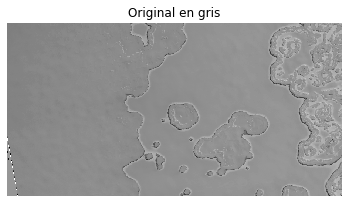

In [90]:
# Imagen en escala de grises
show_image(halo_gris, "Original en gris")

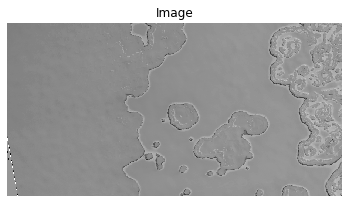

In [111]:
# Aplicar filtro de eliminación de ruido bilateral
halosinruido = denoise_bilateral(halo_gris, multichannel=False)
show_image(halosinruido)

### CANNY SIGMA DE 1

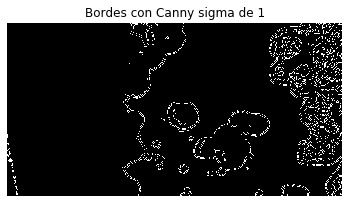

In [131]:
from skimage.feature import canny
# Aplicar detector canny
canny_edges = canny(halosinruido)
# Mostrar
show_image(canny_edges, "Bordes con Canny sigma de 1")

### CANNY CON SIGMA DE 0.5

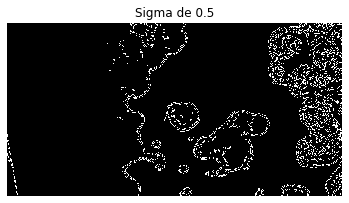

In [113]:
# Aplicar detector Canny con un sigma de 0.5
canny_edges_0_5 = canny(halosinruido, sigma=0.5)
# Mostrar
show_image(canny_edges_0_5, "Sigma de 0.5")

# A la vuelta de la esquina
## Harris corner detector

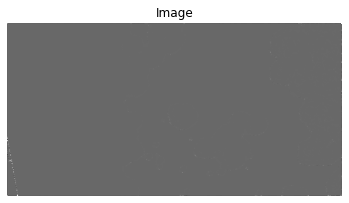

In [118]:
from skimage.feature import corner_harris 
from skimage.color import rgb2gray 
# Convert image to grayscale
image = rgb2gray(halo_gris)
# Apply the Harris corner detector on the image
measure_image = corner_harris(halo_gris)
# Show the Harris response image
show_image(measure_image)

In [132]:
from skimage.feature import corner_peaks
# Finds the coordinates of the corners
coords = corner_peaks(corner_harris(canny_edges), min_distance=5) 
print("Un total de", len(coords), "esquinas fueron detectadas.")  

Un total de 500 esquinas fueron detectadas.


In [129]:
# Funcion para mostrar imagen con esquinas
def show_image_with_corners(image, coords, title="Corners detected"): 
    plt.imshow(image, interpolation='nearest', cmap='gray') 
    plt.title(title)
    plt.plot(coords[:, 1], coords[:, 0], '+r', markersize=15) 
    plt.axis('off')
    plt.show()

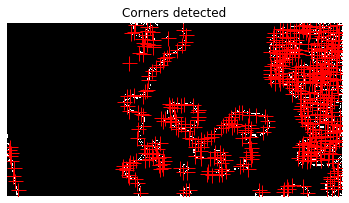

In [130]:
# Mostrar imagen con marcas en las esquinas detectadas
show_image_with_corners(canny_edges, coords)